# Oefeningen

## Breast Cancer

In [32]:
#import ...
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

In [33]:
# Laad de dataset in. Bekijk deze even om te zien waar je juist mee gaan werken
breast_cancer = load_breast_cancer()

x = breast_cancer.data
y = breast_cancer.target

In [34]:
# Split de dataset. We gebruiken in deze les consequent random seed 10.
x_trn, x_tst, y_trn, y_tst = train_test_split(x,y, test_size=0.2, random_state = 10)

In [35]:
# Gebruik een standardscaler
scaler = StandardScaler()
x_trn_scl = scaler.fit_transform(x_trn)
x_tst_scl = scaler.transform(x_tst)

In [41]:
# Creëer en train een SVM classifier. Gebruik random seed 10.
param_grid = {
    'C': [0.01,0.1, 1, 10, 100], 
    'gamma': [1, 0.1, 0.01, 0.001,0.0001], 
    'kernel': ['linear','rbf', 'poly', 'sigmoid',]  
}

classifier = SVC(random_state=10)

grid_search = GridSearchCV(estimator=classifier, 
                           param_grid=param_grid, 
                           cv=10,
                           n_jobs=-1
                          )


grid_search.fit(x_trn_scl,y_trn)
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")
best_classifier = grid_search.best_estimator_

Best Parameters: {'C': 0.1, 'gamma': 1, 'kernel': 'linear'}


In [42]:
# Maak voorspellingen over de test data
predicted = best_classifier.predict(x_tst_scl)

In [43]:
# Bereken de accuraatheidscore van je model
accuracy = accuracy_score(y_tst,predicted)
print(accuracy)
# Laat een classification report genereren.
report = classification_report(y_tst,predicted)
print(report)

0.9736842105263158
              precision    recall  f1-score   support

           0       0.97      0.95      0.96        39
           1       0.97      0.99      0.98        75

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114


Even opfrissen:
- *Precision*: (aantal True Positives) / (aantal True Positives + aantal False Positives)
- *Recall*: (aantal True Positives) / (aantal True Positives + aantal False Negatives)
- *Accuracy*: (aantal True Positive + aantal True Negative) / (totaal aantal Positive + totaal aantal Negative)

In [ ]:
# Extra oefening: je kan nog finetunen met de hyperparameters...

## Digits

Experimenteer met verschillende kernels, C-waardes, en kies een optimale configuratie.

In [12]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import numpy as np

In [13]:
# Digits dataset:
digits = datasets.load_digits()
x = digits.data
y = digits.target
#print(digits)

In [14]:
# Data splitten
x_trn, x_tst, y_trn, y_tst = train_test_split(x,y, test_size=0.2, random_state = 10)

In [15]:
# Standardizeren, doe dit eens in een pipeline samen met je model
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardize features
    ('classifier', SVC()),  # Classifier
])

param_grid = {
    'classifier__C': [0.1, 1, 10, 100],
    'classifier__gamma': [1, 0.1, 0.01, 0.001],
    'classifier__kernel': ['linear','rbf', 'poly', 'sigmoid']
}
grid = GridSearchCV(pipeline, param_grid, refit=True)
grid.fit(x_trn, y_trn)

GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier', SVC())]),
             param_grid={'classifier__C': [0.1, 1, 10, 100],
                         'classifier__gamma': [1, 0.1, 0.01, 0.001],
                         'classifier__kernel': ['linear', 'rbf', 'poly',
                                                'sigmoid']})

In [16]:
# Maak voorspellingen op de test data
predicted = grid.predict(x_tst)

In [18]:
accuracy = accuracy_score(y_tst,predicted)
print(accuracy)
report = classification_report(y_tst,predicted)
print(report)
# bereken accuraatheid en classificatie report. Welk cijfers is het moeilijkst om te classificeren ?
"""Ik vermoed 8"""

0.9916666666666667
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       1.00      0.94      0.97        34
           2       1.00      1.00      1.00        34
           3       1.00      1.00      1.00        40
           4       1.00      1.00      1.00        34
           5       1.00      1.00      1.00        32
           6       1.00      1.00      1.00        37
           7       1.00      1.00      1.00        40
           8       0.92      1.00      0.96        33
           9       1.00      0.97      0.99        39

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360


'Ik vermoed 8'

Voor de volgende opgave mag je de hulp van ChatGPT en dergelijke inroepen.

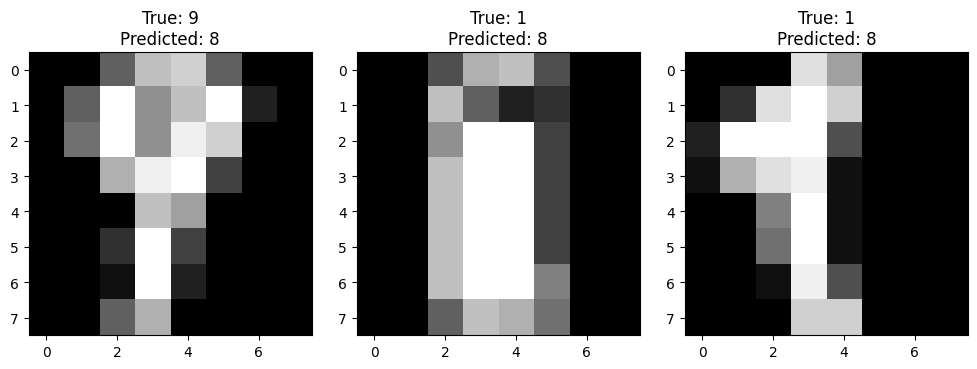

In [25]:
misclassified = np.where(y_tst != predicted)[0]
fig, axes = plt.subplots(3, 3, figsize=(10, 10))

if len(misclassified) < 9:
    for ax in np.ravel(axes)[len(misclassified):]:
        fig.delaxes(ax)

for index, error in enumerate(misclassified[:9]):
    ax = np.ravel(axes)[index]
    ax.imshow(np.reshape(x_tst[error], (8,8)), cmap='gray')
    ax.set_title(f'True: {y_tst[error]}\nPredicted: {predicted[error]}')

plt.tight_layout()
plt.show()

#Deze zijn ook moeilijk te spotten, vind ik.

## Wijn

Train een SVM-classificator op de Wine-dataset, die je kunt laden met 'sklearn.datasets.load_wine()'. Deze dataset bevat de chemische analyse van 178 wijnmonsters geproduceerd door 3 verschillende telers: het doel is om een classificatiemodel te trainen dat in staat is om de cultivator te voorspellen op basis van de chemische analyse van de wijn. Aangezien SVM-classifiers binaire classifiers zijn, moet je one-versus-all gebruiken om alle 3 klassen te classificeren. Welke nauwkeurigheid kan je bereiken?

Stappenplan:
1. Data inladen
2. Train/test split
3. Een lineaire SVM gebruiken
4. Een lineaire SVM gebruiken met 1000000 iteraties
5. Evalueren
6. Oplossingen zoeken voor mogelijke problemen

In [63]:
# Lineaire SVM gebruiken
# Het probleem met meerdere klasses oplossen - bekijk de decoumentatie van LinearSVM op scikit learn docs
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score

wine = datasets.load_wine()
x = wine.data
y = wine.target

x_trn, x_tst, y_trn, y_tst = train_test_split(
    x, y, test_size=0.2, random_state=10
)

sc = StandardScaler()
x_trn = sc.fit_transform(x_trn)
x_tst = sc.transform(x_tst)

clf = svm.SVC(kernel='linear')
clf.fit(x_trn, y_trn)

predicted = clf.predict(x_tst)
print("Accuracy:", accuracy_score(y_tst, predicted))
print(classification_report(y_tst, predicted, target_names=wine.target_names))

Accuracy: 0.9722222222222222
              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        10
     class_1       1.00      0.94      0.97        18
     class_2       0.89      1.00      0.94         8

    accuracy                           0.97        36
   macro avg       0.96      0.98      0.97        36
weighted avg       0.98      0.97      0.97        36


In [64]:
# gebruik 1000000 iteraties
clf = svm.SVC(kernel='linear', max_iter=1000000)
clf.fit(x_trn, y_trn)

predicted = clf.predict(x_tst)
print("1000000 iteraties")
print(f"Accuracy: {accuracy_score(y_tst, predicted)}")
print(classification_report(y_tst, predicted, target_names=wine.target_names))
# wat is nu je conclusie over de dataset ? Hoe kun je dit oplossen ?
"""De accuracy blijft hetzelfde, waarschijnlijk komt dit door dat er te weinig data is."""

1000000 iteraties
Accuracy: 0.8888888888888888
              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        10
     class_1       1.00      0.78      0.88        18
     class_2       0.67      1.00      0.80         8

    accuracy                           0.89        36
   macro avg       0.89      0.93      0.89        36
weighted avg       0.93      0.89      0.89        36


'De accuracy blijft hetzelfde, waarschijnlijk komt dit door dat er te weinig data is.'

In [66]:
# zoek op de documentatie op hoe je de cross_val_score kan gebruiken om cross-validatie te doen
from sklearn import datasets
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score

wine = datasets.load_wine()
x = wine.data
y = wine.target

x_trn, x_tst, y_trn, y_tst = train_test_split(
    x, y, test_size=0.2, random_state=10
)

sc = StandardScaler()
x_trn = sc.fit_transform(x_trn)
x_tst = sc.transform(x_tst)

clf = svm.SVC(kernel='linear')
clf.fit(x_trn, y_trn)

# cross-validation with 5 folds
scores = cross_val_score(clf, x_trn, y_trn, cv=5)

predicted = clf.predict(x_tst)
print(f"Cross-validation scores: {scores}")
print(f"Average cross-validation score: {scores.mean()}")
print(f"Accuracy: {accuracy_score(y_tst, predicted)}")
print(classification_report(y_tst, predicted, target_names=wine.target_names))

Cross-validation scores: [1. 1. 1. 1. 1.]
Average cross-validation score: 1.0
Accuracy: 0.8888888888888888
              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        10
     class_1       1.00      0.78      0.88        18
     class_2       0.67      1.00      0.80         8

    accuracy                           0.89        36
   macro avg       0.89      0.93      0.89        36
weighted avg       0.93      0.89      0.89        36


### Nu kijken we naar andere kernels voor algemene SVM

We werken verder met dezelfde dataset, maar nu niet meer beperkt tot een lineaire SVM

In [67]:
from sklearn.pipeline import Pipeline, make_pipeline # ter illustratie, make_pipeline heeft lichtjes andersyntax dan met Pipeline werken
svm_clf = make_pipeline(StandardScaler(), SVC(random_state=10))
cross_val_score(svm_clf, x_trn, y_trn).mean()

0.993103448275862

Nu gaan ze zoeken naar optimizatie van parameters. Dit moet ik ook nog introduceren in de theorieles

In [68]:
# optimaliseer de parameters met CVGrid Search
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score

wine = datasets.load_wine()
x = wine.data
y = wine.target

x_trn, x_tst, y_trn, y_tst = train_test_split(
    x, y, test_size=0.2, random_state=10
)

sc = StandardScaler()
x_trn = sc.fit_transform(x_trn)
x_tst = sc.transform(x_tst)

param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001]}

clf = svm.SVC(kernel='linear')

clf = GridSearchCV(clf, param_grid, refit=True)
clf.fit(x_trn, y_trn)

predicted = clf.predict(x_tst)
print("Best parameters found: ", clf.best_params_)
print("Best score: ", clf.best_score_)
print("Accuracy:", accuracy_score(y_tst, predicted))
print(classification_report(y_tst, predicted, target_names=wine.target_names))

Best parameters found:  {'C': 1, 'gamma': 1}
Best score:  1.0
Accuracy: 0.8888888888888888
              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        10
     class_1       1.00      0.78      0.88        18
     class_2       0.67      1.00      0.80         8

    accuracy                           0.89        36
   macro avg       0.89      0.93      0.89        36
weighted avg       0.93      0.89      0.89        36


Vergelijk nu de best_score_component van de CVGridSearch met de score die dit model haalt op de test set. Er zit een verschil op. Wat is er gebeurt ? Hoe hadden we dit moeten oplossen ?

    De crossvalidatie score is gelijk aan 1, het model is overfit.

## Regressie met een SVM

Gegeven een dataset, kan je regressie doen in plaats van classificatie. De algoritmes werken bijna hetzelfde, met volgende cruciaal verschil:
- de classifier wil zoveel mogelijk instances *buiten* de straat zetten.
- de regressor wil zoveel mogelijk instances *binnen* de straat zetten.

Beschouw volgende dataset die je wil benaderen met een regressiemodel:

In [71]:
from sklearn.svm import SVR # de R in SVR is van regressor, de C in SVC van classifier
import numpy as np
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

# code om een kwadratische dataset te genereren
np.random.seed(42)
X = 2 * np.random.rand(50, 1) - 1
y = 0.2 + 0.1 * X[:, 0] + 0.5 * X[:, 0] ** 2 + np.random.randn(50) / 10

In [89]:
pipe = make_pipeline(
    StandardScaler(),
    SVR()
)

param_grid = {
    'svr__kernel': ['linear', 'poly', 'rbf','sigmoid'],
    'svr__C': [0.1, 1, 10, 100],
    'svr__epsilon': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
}

x_trn, x_tst, y_trn, y_tst = train_test_split(
    X, y, test_size=0.2, random_state=10
)

gridsearch = GridSearchCV(pipe, param_grid, cv=5)
gridsearch.fit(x_trn, y_trn)

best_params = gridsearch.best_params_
print("Best parameters found: ", best_params)

# Use the best parameters to fit the model
svm_poly_reg = make_pipeline(
    StandardScaler(),
    SVR(kernel=best_params['svr__kernel'], C=best_params['svr__C'], epsilon=best_params['svr__epsilon'])
)
svm_poly_reg.fit(x_trn, y_trn)

Best parameters found:  {'svr__C': 1, 'svr__epsilon': 0.1, 'svr__kernel': 'rbf'}


Pipeline(steps=[('standardscaler', StandardScaler()), ('svr', SVR(C=1))])

Met volgende code kun je bekijken wat het model heeft bereikt (ter illustratie)

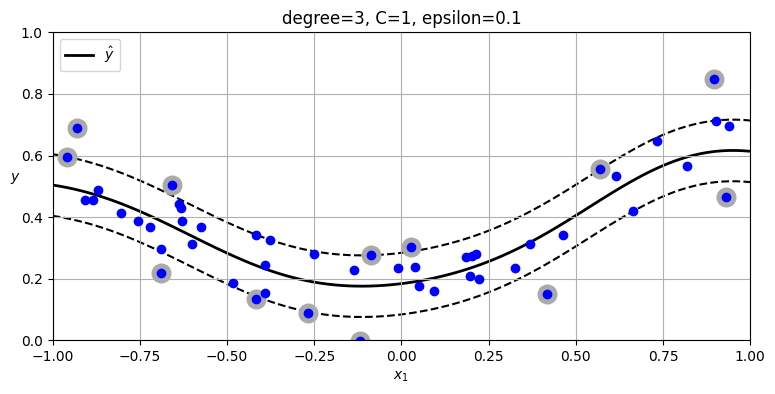

In [90]:

import matplotlib.pyplot as plt

def find_support_vectors(svm_reg, X, y):
    y_pred = svm_reg.predict(X)
    epsilon = svm_reg[-1].epsilon
    off_margin = np.abs(y - y_pred) >= epsilon
    return np.argwhere(off_margin)

def plot_svm_regression(svm_reg, X, y, axes):
    x1s = np.linspace(axes[0], axes[1], 100).reshape(100, 1)
    y_pred = svm_reg.predict(x1s)
    epsilon = svm_reg[-1].epsilon
    plt.plot(x1s, y_pred, "k-", linewidth=2, label=r"$\hat{y}$", zorder=-2)
    plt.plot(x1s, y_pred + epsilon, "k--", zorder=-2)
    plt.plot(x1s, y_pred - epsilon, "k--", zorder=-2)
    plt.scatter(X[svm_reg._support], y[svm_reg._support], s=180,
                facecolors='#AAA', zorder=-1)
    plt.plot(X, y, "bo")
    plt.xlabel("$x_1$")
    plt.legend(loc="upper left")
    plt.axis(axes)

svm_poly_reg._support = find_support_vectors(svm_poly_reg, X, y)

fig, axes = plt.subplots(ncols=1, figsize=(9, 4), sharey=True)
plt.sca(axes)
plot_svm_regression(svm_poly_reg, X, y, [-1, 1, 0, 1])
plt.title(f"degree={svm_poly_reg[-1].degree}, "
          f"C={svm_poly_reg[-1].C}, "
          f"epsilon={svm_poly_reg[-1].epsilon}")
plt.ylabel("$y$", rotation=0)
plt.grid()

plt.savefig("svm_with_polynomial_kernel_plot")
plt.show()

Experimenteer met andere kernels en hperparameters of je betere resultaten kan bekomen.